In [ ]:
pip install xgboost shap scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/bilel/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Exactitude (accuracy) sur le test : 0.956


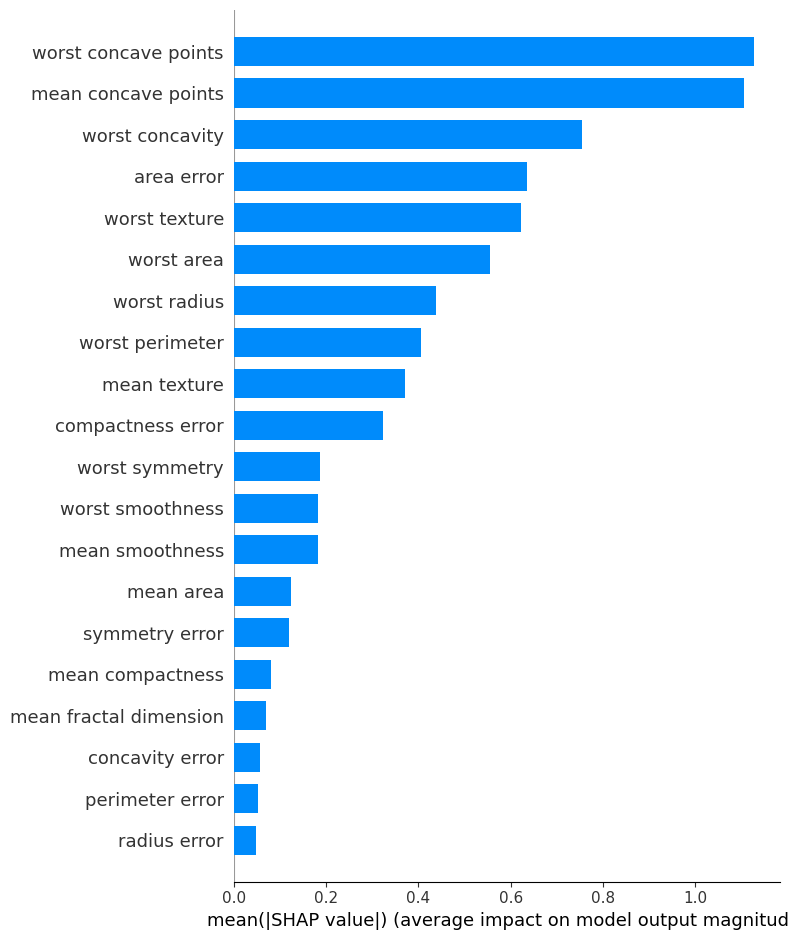

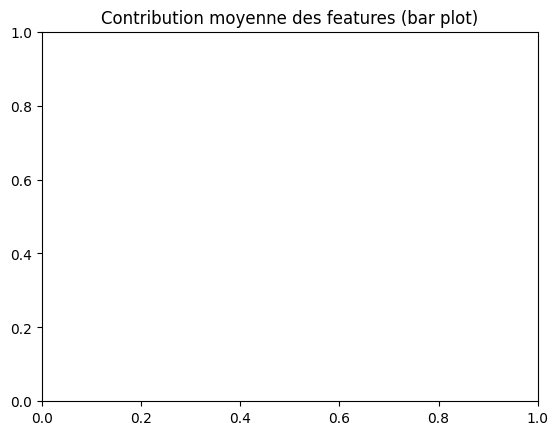

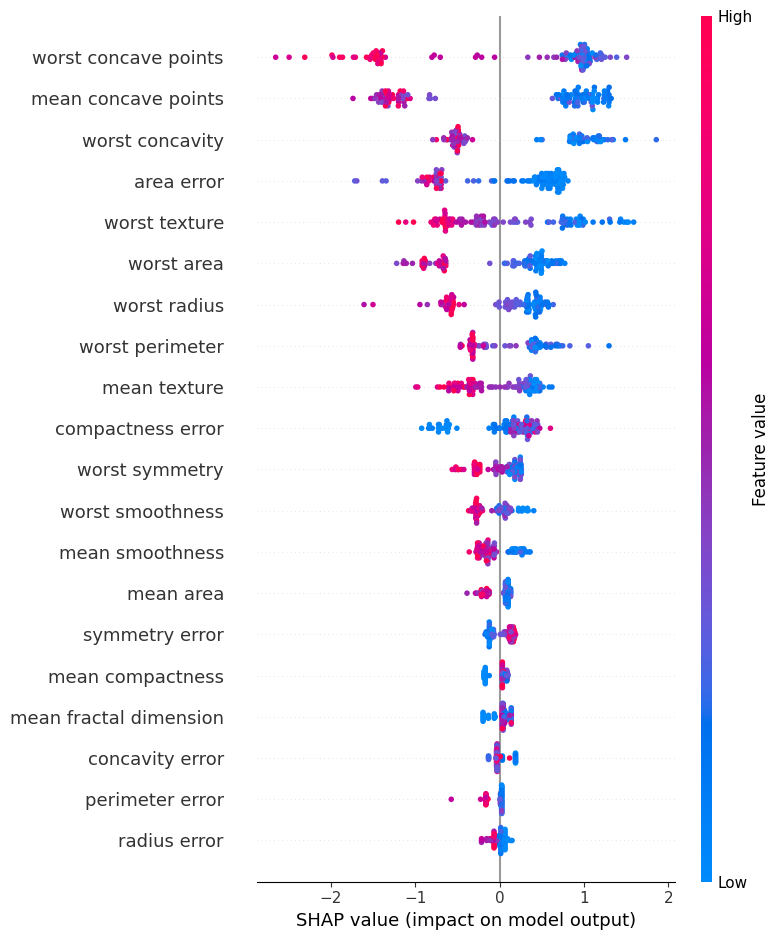

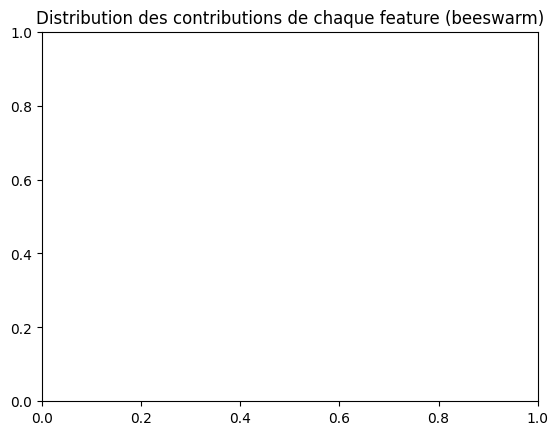

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# 1. Chargement du jeu de données
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# 2. Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Entraînement du modèle XGBoost
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# 4. Évaluation rapide du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude (accuracy) sur le test : {accuracy:.3f}")

# 5. Calcul des valeurs SHAP
#    Pour les modèles tree-based, on peut utiliser TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 6. Visualisation des valeurs SHAP

# 6.1 Summmary plot (beeswarm)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Contribution moyenne des features (bar plot)")
plt.show()

shap.summary_plot(shap_values, X_test)
plt.title("Distribution des contributions de chaque feature (beeswarm)")
plt.show()

# 6.2 Force plot (nécessite parfois shap.initjs() dans un Notebook)
#    Pour un seul exemple :
index_to_explain = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[index_to_explain,:],
    X_test.iloc[index_to_explain,:]
)